In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

**Exercise 2**

b) The formula for the probability to be healthy (H) despite a positive test result (E) is $$P(H\vert E)=\frac{0.01\cdot(1-p)}{0.6\cdot p+0.01\cdot(1-p)}$$ where $p$ is the Covid-19 prevalence in the general population.

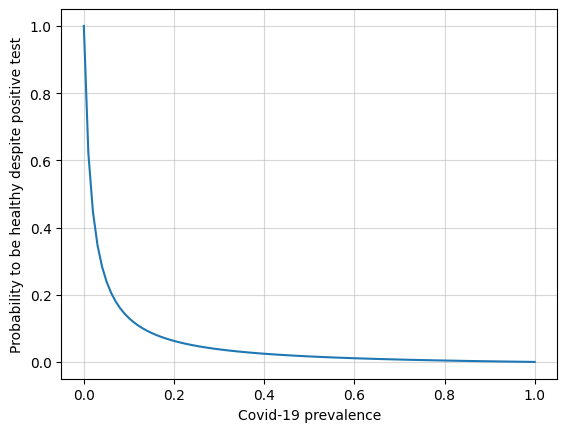

In [5]:
p = np.linspace(0,1,100)
plt.plot(p, 0.01*(1-p)/(0.6*p+0.01*(1-p)))
plt.grid(alpha = 0.5)
plt.xlabel("Covid-19 prevalence")
plt.ylabel("Probability to be healthy despite positive test")
plt.show()

**Exercise 2**

a)

In [34]:
def p(n_obs, lambda_S, lambda_B): #probability to count n_obs or less events
    return sum([(lambda_S+lambda_B)**n/factorial(n) * np.exp(-(lambda_S+lambda_B)) for n in range(0,n_obs+1)])

lambda_B = 1.8
n_obs = 5

print("p(n >= 5) =", 1 - p(n_obs-1, 0, lambda_B))

p(n >= 5) = 0.03640666100108336


b)

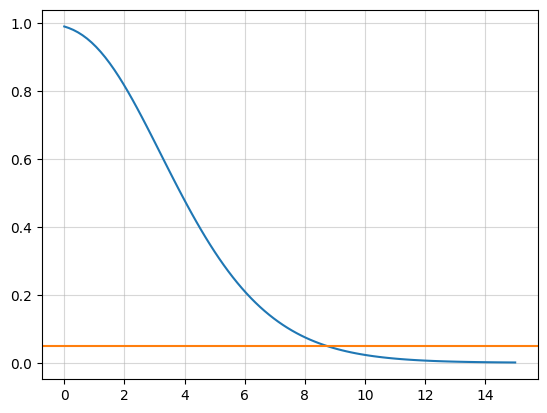

In [22]:
l = np.linspace(0,15,100)
plt.plot(l, p(n_obs, l, lambda_B))
plt.axhline(0.05, c = "tab:orange")
plt.grid(alpha = 0.5)
plt.show()

Judging by the plot, the interval search for $\lambda_S^{max}$ can be performed between 6 and 10.

In [41]:
L, R = 6, 10
iters = 0

f = lambda x: p(n_obs, x, lambda_B) - 0.05

while R-L >= 1e-5 and iters < 1000:
    m = (R+L)/2
    if f(m) > 0: L = m
    elif f(m) < 0: R = m
    else: R = m; L = m
    iters += 1

res = L
print("lambda_S =", res)

lambda_S = 8.713027954101562


c)

In [39]:
N = 10000000

data = np.random.poisson(lambda_B + res, N)
frac = data[np.argwhere(data <= n_obs)]

print(len(frac)/N)

0.0500354
